In [331]:
import numpy as np

# customers
class Customer:
    
    def __init__(self, number, arrival_time, queue_time = 0, service_time = 5):
        self.number = number
        self.arrival_time = arrival_time
        self.queue_time = queue_time
        self.service_time = int(np.random.poisson(service_time, 1))


In [332]:
def simulate(queue_times, service_times, system_times):
    t=0
    queue = []
    tot_arr = 0
    show_up= True
    customer_number = 1
    served_customers = []
    service_available = True
    service_time_remaining = 0

    while t < 720: # while store is open (minutes/day)

        if show_up == True: # create inter arrival times
            at = int(np.random.poisson(3, 1)) + 1
            tot_arr += at
            show_up = False


        if t == tot_arr: # make new customers join the queue
            queue.append(Customer(customer_number, at))
            show_up = True
            customer_number += 1

        if service_available and queue: #make queued customer join cashier
            served_customers.append(queue.pop(0))
            service_available = False
            service_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        service_time_remaining -= 1

        if service_time_remaining == 0: #open cashier when customer leaves
            service_available = True


        t += 1

        if queue: # add 1 minute waiting time to each customer per loop iteration
            for customer in queue:
                customer.queue_time += 1

    for customer in served_customers: # append all data to analyze later
        queue_times.append(customer.queue_time)
        service_times.append(customer.service_time)
        system_times.append(customer.queue_time + customer.service_time)
           

In [333]:
queue_times = []
service_times = []
system_times = []

for i in range(1000):
    simulate(queue_times, service_times, system_times)

(array([0.00452659, 0.00437571, 0.00437571, 0.00271596, 0.00799698,
        0.00467748, 0.00407393, 0.00377216, 0.00452659, 0.00241418,
        0.00482837, 0.00467748, 0.00603546, 0.00362127, 0.00301773,
        0.00256507, 0.00422482, 0.00452659, 0.00497925, 0.0033195 ,
        0.00316862, 0.00437571, 0.00316862, 0.00362127, 0.00422482,
        0.00392305, 0.00286684, 0.00301773, 0.00437571, 0.00316862,
        0.00452659, 0.00392305, 0.00452659, 0.00437571, 0.00573369,
        0.00633723, 0.00407393, 0.00513014, 0.00467748, 0.00392305,
        0.00286684, 0.00256507, 0.00256507, 0.00120709, 0.00165975,
        0.00045266, 0.00135798, 0.00015089, 0.00015089, 0.00045266]),
 array([  0. ,   5.5,  11. ,  16.5,  22. ,  27.5,  33. ,  38.5,  44. ,
         49.5,  55. ,  60.5,  66. ,  71.5,  77. ,  82.5,  88. ,  93.5,
         99. , 104.5, 110. , 115.5, 121. , 126.5, 132. , 137.5, 143. ,
        148.5, 154. , 159.5, 165. , 170.5, 176. , 181.5, 187. , 192.5,
        198. , 203.5, 209. , 214.5

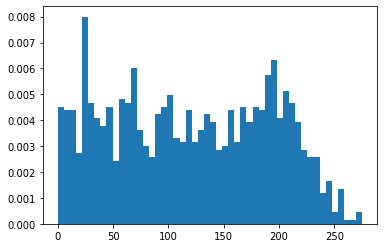

In [334]:
import matplotlib.pyplot as plt

plt.hist(queue_times, bins = 50, density=True)

(array([0.02766252, 0.        , 0.        , 0.09958506, 0.        ,
        0.        , 0.24343015, 0.        , 0.        , 0.        ,
        0.4813278 , 0.        , 0.        , 0.57261411, 0.        ,
        0.        , 0.62517289, 0.        , 0.        , 0.        ,
        0.55048409, 0.        , 0.        , 0.34024896, 0.        ,
        0.        , 0.21023513, 0.        , 0.        , 0.        ,
        0.11065007, 0.        , 0.        , 0.04149378, 0.        ,
        0.        , 0.01383126, 0.        , 0.        , 0.        ,
        0.00829876, 0.        , 0.        , 0.00276625, 0.        ,
        0.        , 0.00276625, 0.        , 0.        , 0.00276625]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
        13.2, 13.5, 13

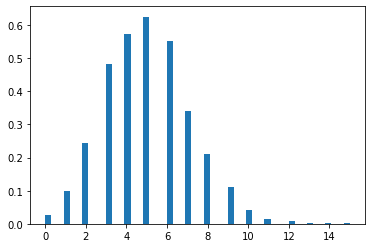

In [335]:
plt.hist(service_times, bins = 50, density=True)

(array([0.00422482, 0.00316862, 0.00482837, 0.00362127, 0.00739344,
        0.00452659, 0.00392305, 0.00362127, 0.00452659, 0.00362127,
        0.00407393, 0.00467748, 0.00603546, 0.00362127, 0.00316862,
        0.00256507, 0.00392305, 0.00452659, 0.00497925, 0.00347039,
        0.00347039, 0.00437571, 0.00286684, 0.0033195 , 0.00437571,
        0.00407393, 0.00256507, 0.0033195 , 0.00422482, 0.00347039,
        0.00392305, 0.00392305, 0.00513014, 0.00452659, 0.00603546,
        0.0055828 , 0.00422482, 0.00543191, 0.00422482, 0.00422482,
        0.00271596, 0.00286684, 0.00241418, 0.00150886, 0.00196152,
        0.00030177, 0.00135798, 0.00030177, 0.        , 0.00060355]),
 array([  4. ,   9.5,  15. ,  20.5,  26. ,  31.5,  37. ,  42.5,  48. ,
         53.5,  59. ,  64.5,  70. ,  75.5,  81. ,  86.5,  92. ,  97.5,
        103. , 108.5, 114. , 119.5, 125. , 130.5, 136. , 141.5, 147. ,
        152.5, 158. , 163.5, 169. , 174.5, 180. , 185.5, 191. , 196.5,
        202. , 207.5, 213. , 218.5

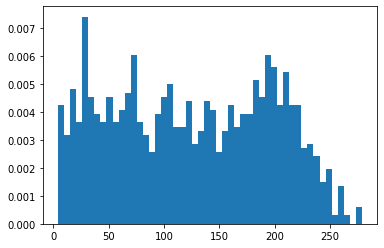

In [336]:
plt.hist(system_times, bins = 50, density=True)